<h3>Pré-Processamento de Dados - Removendo valores anômalos</h3>

In [65]:
import numpy as np

dados = [10,306,479,627,20,523,482,483,542,699,535,617,577,471,615,583,441,562,563,527,453,
         530,433,541,585,704,443,569,430,637,331,511,552,496,484,566,554,472,335,512,422,455,
         449,432,607,679,434,597,639,565,415,486,668,414,665,763,557,304,404,454,689,610,483,
         441,657,590,402,476,437,483,529,363,711,543,30,1369,1350,1400]

dados = np.array(dados)
print(dados)

[  10  306  479  627   20  523  482  483  542  699  535  617  577  471
  615  583  441  562  563  527  453  530  433  541  585  704  443  569
  430  637  331  511  552  496  484  566  554  472  335  512  422  455
  449  432  607  679  434  597  639  565  415  486  668  414  665  763
  557  304  404  454  689  610  483  441  657  590  402  476  437  483
  529  363  711  543   30 1369 1350 1400]


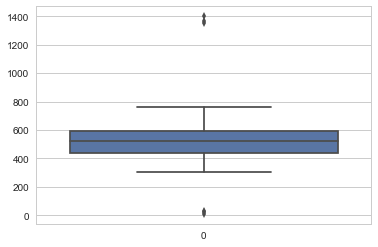

In [66]:
#Visualização dos valores anômalos

%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.boxplot(data=dados);

In [67]:
#verificando o valor da média

np.mean(dados,axis=0)

535.5384615384615

In [68]:
#Verificando o valor de desvio padrão

np.std(dados, axis=0)

216.062947398805

In [69]:
#Fronteira de valor abaixo da média em duas vezes o desvio padrão

mean = np.mean(dados, axis=0)
sd = np.std(dados, axis=0)

In [70]:
mean - 2 * sd

103.41256674085156

In [71]:
#Fronteira de valor abaixo da média em duas vezes o desvio padrão

mean + 2 * sd

967.6643563360715

In [72]:
#Listando os valores abaixo da média em duas vezes o desvio padrão

for x in dados:
    if (x < mean - 2 * sd):
        print(x)

10
20
30


In [73]:
#Listando os valores acimada média em duas vezes o desvio padrão

for x in dados:
    if (x > mean + 2 * sd):
        print(x)

1369
1350
1400


In [74]:
#Removendo os valores muito abaixo da média (10,20,30)

dados = [x for x in dados if (x > mean - 2 * sd)]
print(dados)

[306, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 402, 476, 437, 483, 529, 363, 711, 543, 1369, 1350, 1400]


In [75]:
#Removendo os valores muito acima da média (1369,1350,1400)

dados = [x for x in dados if (x < mean + 2 * sd)]
print(dados)

[306, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 402, 476, 437, 483, 529, 363, 711, 543]


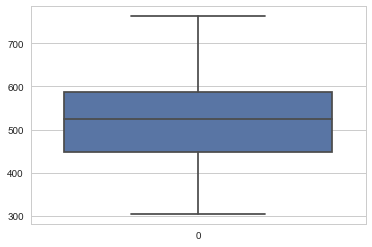

In [76]:
#visualizando os valores novamente
sns.boxplot(data=dados);

<h3>Pré-Processamento de Dados - Discretização de dados</h3>

In [78]:
import pandas as pd

In [87]:
#Conjunto de dados de exemplo

altura =[1.50,1.57,1.62,1.70,1.85,1.90,1.55,1.77]

In [88]:
#Aplicando a discretização em 3 bins de tamanho igual e com os labels P, M, G
#Vamos transformar valores numéricos em valores categóricos com o 'qcut' do pandas
altura = pd.qcut(altura,3,labels=['P','M','G'])

In [89]:
print(altura)

[P, P, M, M, G, G, P, G]
Categories (3, object): [P < M < G]


In [90]:
#Verificando a quantidade de objetos em cada bin

altura.value_counts()

P    3
M    2
G    3
dtype: int64

In [91]:
#lendo uma base de dados
#base de dados que contém dados de imóveis

dataset = pd.read_csv('kc_house_data.csv')

In [92]:
#Verificando o número de imóveis e a quantidade de pisos
#Vamos transformar os valores 1.0, 2.0, 1.5 .... em valores categóricos
dataset['floors'].value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [93]:
#Discretizando os valores do atributo floors e armazenando o resulto no atributo floors_labels

dataset['floors_labels'] = pd.cut(dataset['floors'],5,labels=['Muito-pequeno', 'Pequeno', 'Médio','Grande','Muito-grande'])

In [94]:
#Verificando o novo atributo
feature = ['floors','floors_labels']
dataset[feature].head(10)

,floors,floors_labels
0,1.0,Muito-pequeno
1,2.0,Pequeno
2,1.0,Muito-pequeno
3,1.0,Muito-pequeno
4,1.0,Muito-pequeno
5,1.0,Muito-pequeno
6,2.0,Pequeno
7,1.0,Muito-pequeno
8,1.0,Muito-pequeno
9,2.0,Pequeno


In [95]:
#verificando os valores únicos do atributo

dataset['floors_labels'].unique()

[Muito-pequeno, Pequeno, NaN, Grande, Médio, Muito-grande]
Categories (5, object): [Muito-pequeno < Pequeno < Médio < Grande < Muito-grande]

In [96]:
#Contagem de valores em cada bin ou categoria

dataset['floors_labels'].value_counts()

Muito-pequeno    12589
Pequeno           8241
Grande             613
Médio              161
Muito-grande         8
Name: floors_labels, dtype: int64

<h3>Pré-Processamento de Dados - Normalização de dados (Norma L2)</h3>


In [97]:
#importando as bibliotecas necessárias

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [98]:
#dados de exemplo

dados = [[-1,2],
        [0.5,6],
        [0,10],
        [1,18],
        ]
print(dados)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


In [99]:
#valor da média

print(np.mean(dados))

4.5625


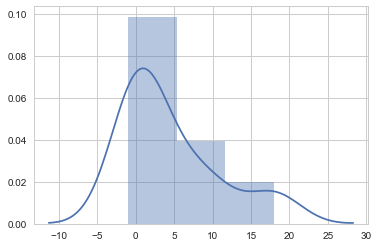

In [101]:
#Visualizar a distribuição dos dados no gráfico
sns.distplot(np.array(dados).reshape(-1))
plt.show()

In [102]:
#Instanciando o objeto Normalize

normalizer = Normalizer().fit(dados)

In [103]:
#Aplicando a normalização dos dados de exemplo utilizando a norma L2

dados2 = normalizer.transform(dados)
print(dados2)
 

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


In [104]:
#valor da média

print(np.mean(dados2))

0.4475919008033141


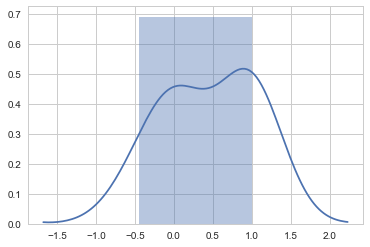

In [105]:
sns.distplot(dados2.reshape(-1))
plt.show()

<h3>Pré-Processamento de Dados - Standartization de dados - MinMaxScaler</h3>


In [108]:
#Criando dados de exemplos com o random do numpy 
#Transformar os dados em um faixa de valores entre 0 e 1 - Standartization
data = np.random.normal(size=50)
data = np.array(data).reshape(-1,1)
print(data)

[[ 0.23709734]
 [ 0.07841159]
 [-0.08395094]
 [ 0.63803255]
 [-1.75412617]
 [ 0.43106485]
 [ 0.41407626]
 [-1.04955166]
 [ 1.23105229]
 [ 0.36773767]
 [-0.20688604]
 [ 1.30502966]
 [ 0.04849316]
 [ 0.54424526]
 [-0.9299781 ]
 [ 0.13175873]
 [-0.17555145]
 [ 1.49034537]
 [ 1.19521361]
 [ 2.85493506]
 [ 0.22047326]
 [ 0.33594738]
 [-0.16495693]
 [ 0.8980381 ]
 [-0.57578943]
 [ 0.88074185]
 [ 0.4224028 ]
 [-0.74789553]
 [-0.07414428]
 [-0.75942864]
 [ 0.27785755]
 [-0.82363102]
 [-1.76261503]
 [-0.4007579 ]
 [-1.10096127]
 [-0.43146809]
 [ 1.13196497]
 [ 1.08708019]
 [-2.77958189]
 [-1.01848857]
 [ 0.9863076 ]
 [-0.30672969]
 [ 0.44373018]
 [ 1.66267887]
 [ 1.03776535]
 [-0.52697397]
 [ 0.19757556]
 [-0.20775586]
 [ 0.9056858 ]
 [ 0.57280092]]


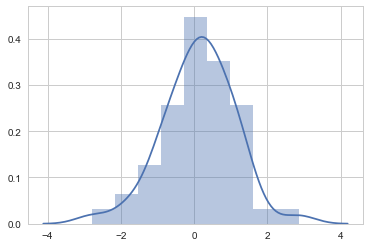

In [109]:
#Visualizando os dados no gráfico
sns.distplot(np.array(data).reshape(-1))
plt.show()

In [110]:
#importando as bibliotecas necesdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXcAAAD3CAYAAADmBxSSAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzt3XmUG+d55/tvAWj0vi/sfeH2imtTbJLmam2UbUmRrMT2ZGLPJNKNPJY9Obm2ju+MnHEmsW9unDO+ciZORp7rrM5VHI99Y400skSLkrVxEyWQIpvbSzbJbvS+r+wVQN0/gJYgimyg2UAXUHg+5/AQQFUBT50Gfii89db7GqZpIoQQwl4cVhcghBAi9iTchRDChiTchRDChiTchRDChiTchRDChlxWFzDP4/FItx0hhFikpqYm40aPJ0y4AzQ1NVldQsx4PB5b7U8kqba/IPucKhJ5nz0ez02XSbOMEELYkIS7EELYkIS7EELYkIS7EELYkIS7EELYkIS7EELYkIS7EELYkIS7EELYkIS7EELYUEJdoSpEIjpwtPWGj7d5J+ifvfGym/nUrvqlliNEVOTIXQghbEjCXQghbEjCXQghbEjCXQghbEjCXQghbEjCXQghbEjCXQghbEjCXQghbCjiRUxKKQfwNNAIzACPaa1bbrDOL4DntNb/XSmVCTwDlAHjwO9orftjXbwQQogbi+bI/WEgQ2u9C3gSeOoG6/wJUBR2/8tAs9Z6H/CPwDeXWqgQQojoRRPue4EDAFrrY8C28IVKqc8CAeClG20Tenz/kisVQggRtWjGlskDRsPu+5VSLq21Tym1Efg88FngP99km3EgP5piFprJOxnZbX8isev+tnknFljWtqjn8rgHl1qO5ez6d15IMu5zNOE+BuSG3XdorX2h278NVAG/AuqBWaVU63Xb5AIj0RTT1NQUzWpJwePx2Gp/IrHz/t5scLA2bxt1tXWLeq6mpvqlF2QhO/+dbyaR93mhL51owv0w8CDwU6XUTqB5foHW+j/M31ZK/THQo7U+oJTaANwPHAfuA966pcqFEELckmjC/VngXqXUEcAAHlVKPQG0aK2fv8k2PwB+pJQ6BMwSbLoRQgixTCKGu9Y6ADx+3cMXbrDeH4fdngQ+t9TihBBC3Bq5iEkIIWxIwl0IIWxIwl2IGPAHTFq7x+gamMAfCFhdjhAyh6oQS+EPmJy/OsgJ3c/45CwALqeDhso87txajTvNaXGFIlVJuAtxi0zT5ODbbVzuHMXpMNi4shjDAG/vOJfaRxifnOXBvSsl4IUlJNyFuEW6Y5rL3TNUlmTziZ11ZGekARAImLzyjpdL7SM89+YVHvr4StIl4MUykzZ3IW7BhdYhWrpnyM9xc9+u+veDHcDhMNi/oxZVV0jf8CSHT3VZWKlIVRLuQizStak53jjZSZrT4IE9DWSkf/QHsMMwuLuphuL8DM63DtE9cM2CSkUqk3AXYpGOn+vB5w9wW00GhbkZN13P4TC44/ZqAN442UEgYC5XiUJIuAuxGIOj05y/OkRhXjo1pe6I61eUZLOuvojB0WlOtwwsQ4VCBEm4C7EIR5u7MIHdmypxGEZU2+zeVEG628m753uZnvFF3kCIGJBwFyJKXf0TtPWMU1WaQ115buQNQjLSXWxeVcLMnJ9X3vHGsUIhPiDhLkSU5ptVdmxYgRHlUfu8jauKcToMnnvzMn5pexfLQMJdiCiMT85ypWuUkoJMKoqzF719VkYat9UX0TM4ybEz3XGoUIgPk3AXIgpnLg9imrBpVfGij9rnNa4pwTDg2ddaME05ehfxJeEuRAQ+f4BzVwfJcDtZW1t4y89TmJvBjvXlaO8w2jscwwqF+KiIww8opRzA00AjMAM8prVuCVv+74FHABP4ttb6BaWUAXQAl0KrHdVafyPGtQuxLFraR5ie9bNVleJyLu146P49Dbx9todXjnu5ra4oRhUK8VHRjC3zMJChtd4VmkP1KeDTAEqpEuArwBYgAzinlPoFsAo4obV+MD5lC7F8zl4ZxAA2rCxZ8nM1rimlJD+DN0928tinN5LhluGdRHxEcxiyFzgAoLU+BmybX6C1HgAatdZzQDkworU2gSagSin1mlLqRaWUin3pQsRf98A1eoYmqS7LIS878kVLkTgdBndvr2VqxsfRZjmxKuInmsOGPGA07L5fKeXSWvsAtNY+pdTvAd8Cvh9apxv4jtb6Z0qpvcAzwPZIL+TxeBZVfKKz2/5EYsf9fb15DIDinABt3raPLL/RYwvxuAdZkRm8kOnZV8+SR9/Si1xmdvw7R5KM+xxNuI8B4VdsOOaDfZ7W+q+UUj8EXlJK3QW8DcyH/yGlVJVSyggd1d9UU1PT4qpPYB6Px1b7E4kd99c0TX748qu4nAbbN310XPY2bxt1tXWLes6mpnoAfnX2EGevDFLdsI4VRVmxKjnu7Ph3jiSR93mhL51ommUOA/cDhNrcm+cXqKCfh06gzhE84RoA/gj4amidRsAbKdiFSDSX2kfoGrhGQ2V+zCfc2L+9BoBfyRWrIk6iCfdngWml1BHgz4GvKaWeUEo9pLXWwCngKHAEOKa1fgP4M+AOpdQbwPcI9qYRIqm85mkHWFL3x5vZvbkSt8vBW6c6pc+7iIuIzTJa6wDw+HUPXwhb/i2C7e3h2wwDD8SiQCGs4PcHeOu9TvKy3dSsiH4cmWhlZaTRtG4FR5u78faMU1eRF/PXEKlNLmIS4gaaLw8wOjHL3sZKnI5buyI1kr2NlQAckpmaRBxIuAtxA0dC3RT3hAI4HravL8ftcnD4tDTNiNiTcBfiOoGAybHmbnKz3GxoKI7b62Smu2hat4L23gm8PeNxex2RmiTchbjOhbYhhsdn2LmxHOcShxuIRJpmRLxIuAtxnfkrR3dvjl+TzDxpmhHxIuEuRBjTNDlyuousDBeNa5Y+lkwk0jQj4kXCXYgwlztH6RueYvu6ctJcsb1w6WakaUbEgwxJJ2zpwNHWW9ru7dAsSZnpzlt+jsWab5o5dKqTz39S3fJkIEKEkyN3IcK09ozhcBjULGIC7KWab5rp6JOmGRE7Eu5ChExMzTEwMk1VaTbuZWqSmSdNMyLWJNyFCGnrDg7vW1e+/EMBhDfNSK8ZEQsS7kKEtIbCvd6CcV6kaUbEmoS7EAQnwe7om6AgN538nHRLaphvmnnrVKclry/sRcJdCKCrfwKfP2BJk8y8betW4HY5OHJapt8TSyfhLgTQGmoKqa9Yvl4y18vKSGPrbWW0947j7RmzrA5hDxLuIuWZpklb9xhul4OKkmxLa9kTGvLgiEyeLZZIwl2kvOHxGcauzVKzIhenw9qPxPb15bicDg5Ll0ixRBGvUFVKOYCngUaCc6Q+prVuCVv+7wlOo2cC39Zav6CUygSeAcqAceB3tNb9sS9fiKV7vwtkAsyGlJ2Zxu2qlHfO9dLZP0FVaY7VJYkkFc1hysNAhtZ6F/Ak8NT8AqVUCfAVYDdwD/CD0GTZXwaatdb7gH8EvhnrwoWIlbae+f7t1rW3h3u/aea0HL2LWxfN2DJ7gQMAWutjSqlt8wu01gNKqUattU8pVQ+MaK1NpdRe4L+EVnsJ+MNoivF4PIsqPtHZbX8iSaT9bfNORLXenM+ka+Aa+dlO+vsWH6Zt3rZFre9xD0ZcJ90XwGHAwaMtrCxIvD7vifR3Xi7JuM/RhHseMBp236+UcmmtfQChYP89gpNkf/8G24wD+dEU09TUFFXRycDj8dhqfyJJtP3tn22Nar2WjhFMcxRVV0JdbfmiXqPN20Zdbd2itmlqqo9qvYNnjnLiQh9V9bdRXmztSd5wifZ3Xg6JvM8LfelE0ywzBoT/XnXMB/s8rfVfARXAx5VSd123TS4wspiChVgurQnU3h5OmmbEUkVz5H4YeBD4qVJqJ9A8v0AppYDvAJ8B5giecA2EtrkfOA7cB7wV27KFWDrTNPH2jJOV4aK0IHNZXjPaYYSnZnwYBvzicCtZGWkfWf6pXfUxrUvYTzTh/ixwr1LqCGAAjyqlngBatNbPK6VOAUcJ9pZ5SWv9hlLqHeBHSqlDwCzw+TjVL8Qt6x2aZGrGx7r6ooQbQz0z3UVVaQ4dfROMXZslL9ttdUkiyUQMd611AHj8uocvhC3/FsH29vBtJoHPxaJAIeKlvTd4srI2QXrJXG91dQEdfRNc6Rxly9pSq8sRSUYuYhIpy9s7jgFUlyVmX/KGyjwM4HKnnLISiyfhLlLSzKyf3qFJVhRlkeFOzNkmszLSqCzNoWdwkonJWavLEUlGwl2kpI7+cUyTZZ1O71asrg72Im7pGI2wphAfJuEuUtL8hBi1KxI73FdVF2AYcKl92OpSRJKRcBcpxzRN2nvHSU9zUlaYZXU5C8pMd1FTlkvf8BQj4zNWlyOSiIS7SDmjE7OMT85RXZaDw5FYXSBvZG1tAQCX2uXEqoiehLtIOd7e4FWpNQneJDOvoTIfp8PgUvuwTJ4toibhLlJOe29wULFkCXd3mpP6ijyGx2cYGJ22uhyRJCTcRUrxBz6YCDuZrvpcM98045UTqyI6Eu4ipXQPTOLzBxK+l8z16srzSE9zor3DBALSNCMik3AXKWV+yIFkaZKZ53I6WFNbwOS0D29v4o3xLhKPhLtIKd7ecRwOg6rSxBkjPVrr6ooAuNA6ZHElIhlIuIuUMTk9x8DIFBXF2aS5nFaXs2ilhZkU5WVwtXuMsWsyHIFYmIS7SBntfcFeMok6CmQkhmFwW30hgYDJGyc6rC5HJDgJd5Ey2nuSs709nKotxDDglXe8VpciEpyEu0gJpmni7R0nM91FSX6G1eXcsqyMNOrK87jSOcrVLhlMTNxcxLFOlVIO4GmgkeA0eo9prVvCln8N+Nehuy9qrb+llDKADuBS6PGjWutvxLRyIRZhcHSaqRlf6Mg38YccWMi6+iJau8d45R0vX/z0JqvLEQkqmoGsHwYytNa7QnOoPgV8GkAptRL4AvAxgtPsvaWUehaYBE5orR+MT9lCLI43SbtA3khdRS552W5e93TwyAMbSHPJD3DxUdG8K/YCBwC01seAbWHL2oFPaa39oen40oBpoAmoUkq9ppR6MTSRthCW+aB/e2LOurQYToeDO5uqGbs2y7vne6wuRySoaI7c84Dwxj2/UsqltfZpreeAgVAzzHeBk1rri0qpcuA7WuufKaX2As8A2yO9kMfjuYVdSFx2259IEml/27wT79/2+U26+ifIy3LS39cV49dpi+nzRau6ODh0wr8cbMY9272sr51If+flkoz7HE24jwHhv2UdWmvf/B2lVAbwd8A48JXQw+8CPgCt9SGlVJVSytBaL3jddFNT02JqT2gej8dW+xNJou1v/2zr+7fbuscImKOsrimirrYyZq/R5m2jrrYuZs+3GJ/aVc/Lp1/nUvcYK9duoDB3eU4SJ9rfeTkk8j4v9KUTTbPMYeB+gFCbe/P8gtAR+3PAKa31l7TW/tCiPwK+GlqnEfBGCnYh4uWD9vY8iyuJrf3bawkETF57t93qUkQCiubI/VngXqXUEcAAHlVKPQG0AE7gDiBdKXVfaP1vAH8GPKOUeoDgEfwjsS5ciGi1947jcjqoKE7sWZcW686mav7+hbO8/HYbv37n6qTvBSRiK2K4h06UPn7dwxfCbt/s9+ADt1qUELEyPjnL8PgMdeW5OJ326lWSm+Vmz+ZKXj/RwZkrg2xaVWJ1SSKB2OvdLsR15nvJJOuQA5F8Ymewzf/lY9ac2BWJS8Jd2JrXBkMOLGTjymKqSrM5fLqL8UkZTEx8QMJd2FbANOnomyA3K42CnHSry4kLwzD4xMfqmfMF5MSq+BAJd2FbfUOTzMz5qVmRa+uTjfdsr8HlNPjl220ygbZ4n4S7sK35LpDJNqXeYuXnpLNzYwXennF0m8yxKoKi6QopRFJq7x3HMKC6zH7hfuBo64fuF+UFO6397fNnuGd77aKe61O76mNTlEgocuQubGlm1k/v0CQrirJIdyffrEuLVV2WQ162m5aOEWbm/JE3ELYn4S5sqaN/HNO0by+Z6xmGwfqGInx+k0teaZoREu7Cpua7QNq9vT3cbXVFGAacvTooJ1aFhLuwH9M0ae8dJz3NSVmRvYYcWEh2Zhr1FXkMjEzTPzxldTnCYhLuwna6Bq4xPjlHdVkODht3gbyRDQ3FQPDoXaQ2CXdhOycu9AH2HXJgITXlueRkpXGpfYRZn5xYTWUS7sJ2TuhguKfKydRwDsNgXX0Rc74ALe0jVpcjLCThLmxlzuen+fIAhbnp5Ga5rS7HEuvqizCAs1eGrC5FWEjCXdjK+dYhZmb9KXnUPi83y01teS59w5MMjMiJ1VQl4S5s5aTuB1KzSSbc+pXBE6vn5MRqypJwF7ZyQvfhcjqoKs22uhRL1ZfnkZXhQnuHmfMFrC5HWCDi2DJKKQfwNNAIzACPaa1bwpZ/DfjXobsvaq2/pZTKBJ4ByghOnP07WocOqYSIk+Hxaa50jtK4poQ0l/2HHFiIwxE8seq50MflzhFuqyuyuiSxzKI5cn8YyNBa7wKeBJ6aX6CUWgl8AdgN7AI+oZTaDHwZaNZa7wP+EfhmrAsX4nrvXQweP9y+tsziShLD+oZgoJ+TE6spKZpRIfcCBwC01seUUtvClrUDn9Ja+wGUUmnAdGib/xJa5yXgD6MpxuPxRFl2crDb/kRi9f4ePBIMsUxzkDbvzLK8Zps3sae3K81z0T14jTP6CrmZN/4143Evrl3e6r+zFZJxn6MJ9zxgNOy+Xynl0lr7tNZzwIBSygC+C5zUWl9USoVvMw7kR1NMU1PTIkpPbB6Px1b7E4nV+xsImHzvuQMU5WVw390f45fLMKdom7eNutq6uL/OUsw5RvjlsTZGptPZqKpuuE5TU33Uz2f139kKibzPC33pRNMsMwaEdz1waK1983eUUhnAP4XW+coNtskF5GoKEVeXO0cYuzZL021ltp51abEaKvPITHeh24bxB+TEaiqJJtwPA/cDKKV2As3zC0JH7M8Bp7TWX5pvngnfBrgPeCtmFQtxA/NDDmy9TdrbwzkdDtbWFjA9639/pEyRGqJplnkWuFcpdQQwgEeVUk8ALYATuANIV0rdF1r/G8APgB8ppQ4Bs8DnY165EGE8F/pwGLBlTanVpSSctbWFnLo0wEXvMA2VUbWQChuIGO5a6wDw+HUPXwi7nXGTTT93q0UJsRgTk7PotiFUXRE5KTrkwEJKCzIpzE3natcYs3N+3Gmp3U00VchFTCLpvXepn4AJTdIkc0OGYbC2thB/wORy52jkDYQtSLiLpCft7ZGtqSkA4KJMwZcyJNxFUjNNE8+FPvKy3ayqKrC6nISVn5NOeXEWHX0TXJuas7ocsQwk3EVSa+0eY2hsmq2qDIdDukAuRNUWAnCxXY7eU4GEu0hq0iQTvVXVBTgMuOiVy05SgYS7SGondB+GAVuVhHskmekuasvzGBiZYmhs2upyRJxJuIukNTk9x7mrg6yqLiA/J93qcpLC2lo5sZoqJNxF0mpuGcDnN2mSo/ao1Vfkk+ZycNE7jGmaVpcj4kjCXSQtj7S3L1qay8GqqnzGJ+foHrxmdTkijiTcRVIyTROP7iM7w/V+LxARnbXzvWbkxKqtSbiLpNTRN0Hf0CRb1pbhdMrbeDGqynLIynBxuWMEf0CaZuxKPhUiKR0/2wPAjg0rLK4k+TgMg1VV+UzP+unsk5Ei7UrCXSSl4+d6MAxouk3C/VasDg1HcKlDmmbsSsJdJJ2xa7NcaB3itroi6QJ5iyqKs8nOTONq5xhzPpnEw44k3EXSefd8LwETtq+Xo/ZbZRgGq6vymZnz897FPqvLEXEg4S6SzvFz8+3t5RZXktzmm2beeq/T4kpEPEScrEMp5QCeBhqBGeAxrXXLdeuUAkeATVrr6dD0ex3ApdAqR7XW34hp5SIlzfkCnLjQx4qiLGpX5EbeQNzUiqIscrPSOHamRybxsKFojtwfBjK01ruAJ4GnwhcqpT4JvAyE/0ZeBZzQWt8Z+ifBLmLi3JVBpmZ87NhQLhNhL5FhGKyuLmBqxvf+BWHCPqIJ973AAQCt9TFg23XLA8B+YCjssSagSin1mlLqRaWUikWxQhw70w3ADmlvj4n5pplDp6Rpxm6imSA7Dwifm8uvlHJprX0AWuuDANfldzfwHa31z5RSe4FngO2RXsjj8URbd1Kw2/5EEu/9DZgmb5zoJsNtMDvqxeNpv+m6bd6JuNbyweu0LcvrxItpmhTmODna3MXRt9/B7Yp8vJdq72tIzn2OJtzHgPDGTcd8sC/gXWA+/A8ppaqUUobWesHL4ZqamqIoJzl4PB5b7U8ky7G/F9qGGJ/q5J7tNezYvnXBdftnW+NaCwSDva62Lu6vE29ZeZP87NVLBDKqaGqsXHDdVHtfQ2Lv80JfOtE0yxwG7gdQSu0EmqPY5o+Ar4a2aQS8kYJdiEiOnA42yezetHAAicXZt6UKkF4zdhPNkfuzwL1KqSOAATyqlHoCaNFaP3+Tbf4MeEYp9QDBI/hHYlGsSF2maXK0uYvMdCdb1pZaXY6t1FfkUVWawzvne5ma8ZGZHk0siEQX8a+otQ4Aj1/38IUbrFcfdnsYeGCpxQkx72rXGD2Dk+zbUiVd9mLMMAz2baniJwc175zr4eO3V1tdkogBuYhJJIUjp7sA2L25wuJK7GnvlmBTlzTN2IeEu0h4pmly+HQXbpdDBgqLk7ryPGrLc/Fc6GNyes7qckQMSLiLhHelc5SOvgm2rV8h7cFxtG9LFXO+AMfO9FhdiogBCXeR8F4/0QHAnVtrLK7E3uZ7zcgFTfYg4S4Smj9g8ubJDrIz09i2TuZKjaeq0hxWVuZzUvcxMTlrdTliiSTcRUI70zLA0NgMexsrSXNJL5l427ulEp/ffH+YB5G8JNxFQvugSUa65y2HDy5o6rK4ErFUEu4iYc3M+Tl8uovSwkzWNxRbXU5KKC/OZnVNAe9d6mfsmjTNJDMJd5GwjjZ3MzXj447bq3E4ZHjf5bKvsYpAIHhFsEheEu4iYR042grAJz6W/INzJZO9jXJBkx1IuIuE1NY9xtkrg9y+tpSKkmyry0kpZUVZqLpCmlsGGB6ftroccYsk3EVCmj9qv293vZVlpKx9W6oImB+MxCmSj4S7SDhTMz5+5WmnKC+DHetlEmwr7G2sxDDkgqZkJuEuEs6bJzuZnPbxyZ11OJ3yFrVCcX6wh9LZK4MMjk5ZXY64BfLJEQklEDB57s3LOByGnEi12L7GSkwTDp+WXjPJSMJdJJRjZ7pp7x3nrqZqSgoyrS4npe3eXInDgENyQVNSijjEnlLKATwNNAIzwGNa65br1ikFjgCbtNbTSqlMgpNilwHjwO9orftjXbywF9M0+emrFzEM+Ozda6wuJ+UV5mWwcVUJp1sG6B+eorRQvmyTSTRH7g8DGVrrXcCTwFPhC5VSnwReBsIH2v4y0Ky13gf8I/DN2JQr7OyE7uNyxyh7NldSXZYbeQMRd3tDwxEcPi0nVpNNNOG+FzgAoLU+Bmy7bnkA2A8M3Wgb4KXQciFuyjRN/sfBiwD8q/1rLa5GzNu9qQKHw5ALmpJQNDMf5AGjYff9SimX1toHoLU+CKCUutk240B+NMV4PJ5oVksadtufSJayvxc6pjjfOsTaqgyGulsYWmL36jbvxNKeIOrXaVuW14knj3twweUNZW4uekd45Y23Kcxxpdz7GpLzsxxNuI8B4b+RHfPBHuU2ucBINMU0NTVFs1pS8Hg8ttqfhRw42kqbt4262lvr3eLzB3jR04fDgG0b6uifzVhyTXW18R9obCn7nEiamuoXXD7ka+P7P32PEX8RhYylzPt6XiJ/lhf60ommWeYwcD+AUmon0LyYbYD7gLei2EakqFOhEQg3rS6hMG/pwS5ia+emClxOgzdOdGCaptXliChFc+T+LHCvUuoIYACPKqWeAFq01s/fZJsfAD9SSh0CZoHPx6RaYTsTU3O8e76PzHQX29fJ1aiJKDfLzfb15Rxt7qZ7WL58k0XEcNdaB4DHr3v4wg3Wqw+7PQl8bqnFCXszTZPXPO34/AH2bakk3S0zLSWqe3fUcrS5m5OXr/HgvVZXI6IhFzEJyzRfHsDbM07NihzW1RdZXY5YwFZVRlFeOs2tk8zO+a0uR0RBwl1YYnB0iiOnu8lwO7lnWy2GIZNxJDKn08FdTTVMz8n8qslCwl0su5lZP7881oY/YHL3thqyM9OsLklEYf+OWgBeOe61uBIRDQl3saz8gQAvHW1leHyGxjWlNFRGdQmESADVZbnUlLh571I/vUOTVpcjIpBwF8vGNE1e93TQ2T/Bysp8dm+usLoksUhbV2djmh9MpiISl4S7WBamafLmyU4utA1TVpjJ/h21OKSdPelsrM0iNyuNl99ukxOrCU7CXcRdwDT51bvtnLkySHF+Bg/saSDNJW+9ZJTmMrh3Rx1j12Y5dEqGAk5k8gkTceUPmBx82/v+EfvDd6wiK0NOoCaz+3bXYxjw4pGrVpciFiDhLuLG7w/wy2OttHSMUFGczac/vooMdzQXRYtEVl6czbZ1K9Btw7R0RDVslLCAhLuIizlfgBePtHK1a4zqshwe3NeAO02uQLWLB/Y0APD8m5ctrkTcjIS7iLnZOT+/OHwFb+84deW5oTZ2CXY7uX1tGbXlubx5spO+YekWmYgk3EVMzcz6+V9vXaGz/xqrqvK5b3c9Lqe8zezG4TD4zF2r8QdMnntDjt4TkTSAipiZmfPz/FtX6BueZG1tIfdsq8HhkO6OiW4xfdbbvBP0zwbX9wdMcjLTePFIKyUFmWSmu/jUrvp4lChugRxSiZiY85v8r1Cwq7pC7tkuwW53TofBlrWl+PwBmlsGrC5HXEfCXSyZzx/gnYsT9A4Fj9jv3lYjFyiliHUNRaSnOTndMsCMXNSUUCTcxZL4/QFefruNoXE/q6vzg0fsEuwpw+1ysmVtKTNzft7TfVaXI8JIuItbZpomP/j5aa52jVGS52L/dhlSIBU1rikhM93Fe5cGGB6ftrocERLxhKpSygE8DTQCM8BjWuuWsOVfBL5xyF1aAAAOVElEQVQE+IA/0Vq/oJQqAi4CZ0KrPau1/otYFy+s9T/fuMwvj7VRUpBJ0yo3TukVk5LSXE62r1/Bmyc7+dmrl/h3D2+yuiRBdEfuDwMZWutdwJPAU/MLlFLlwO8De4BPAt9RSqUDW4F/1lrfGfonwW4z713s4x9eOEtRXjq/tqeBNKccsaey9Q1F5GW7eenIVXoGr1ldjgCMSLOZK6W+BxzXWv8kdL9Ta10Vuv0QcL/W+vHQ/WeBPwXuBh4ieDTfB/y+1nrB6Vs8Ho9Mq54khid8/PBAH7O+AI/sL6V3ZM7qkkQC6Byc5eTlSVRVBr91R4nV5aSMpqamGx5ZRdPPPQ8YDbvvV0q5tNa+GywbB/IJTqDt0Vq/opT6AvCXwGejKDKKcpKDx+Ox1f7Mm57x8X/85VtMzQb4vc9t4ZM76zhwtJU2bxt1tXVWl7esZJ8/rLbGZI5OzlwexJdeycc22mO8/kT+LHs8npsui6ZZZgzIDd8mFOw3WpYLjAC/Al4LPfYscHu0xYrEZZomf/E/TtLaPcZ9u+v55M7UCjaxMMMw+PJvbMbpMPjh/2xmesYXeSMRN9GE+2HgfgCl1E6gOWzZcWCfUipDKZUPrCN4EvVvgM+E1rkHuPnXi0gaP3+thUOnuljfUMQXPy0nzcRH1Zbn8et3rqZveIqfHNRWl5PSogn3Z4FppdQR4M+BrymlnlBKPaS17gG+D7xF8Gj9P2mtpwmeeP2yUup14HHgf49L9WLZeC708qMXz1Gcn8GTv71dJtsQN/Wb+9eyoiiLn7/eQvNluXLVKhHb3LXWAYIBHe5C2PK/Bv76um2uAnfFokBhva6BCb77jAeX08EfPLKDwrwMq0sSCSwj3cXXv9DEf/xvh/jeP3n4/tfvIjfLbXVZKUcOv8SCpmZ8/F9/f5xrU3N85TONrK0ttLokkQRuqy/itz6hGBid5i9/+h6ReuWJ2JNwFzdlmib/9Scn8PaM82t7G9i/o9bqkkQS+dw9a9mwspijzd389NWLVpeTciTcxU397NVLHDndzcZVxfzuQxutLkckGafD4D/8222UFmbyzEsXeONEh9UlpRQZz30ZLGa87EiWa7zsd8718MyB85QUZPIf/+12mXBDROVG7/V7ttXw89da+N4/n+BS+wjVZTnLWlOqjjEvn1jxEVe7RvnuMx7SnA7+0yM7KMhNt7okkcSK8zODAWvCC4eu0No9ZnVJKUHCXXzI4OgU3/6bY0zN+Pjqb21ldU2B1SUJG6hZkcv9e+oxDHjpyFUueoetLsn2JNzF+yan5/j2377NwOg0v33/OvZtqbK6JGEjdeV5PLh3JU6ng4PHvbz5Xic+f8DqsmxLwl0AwTFjvvU3x7jSOcond9bx2bvXWF2SsKHK0hw+c9dqCvPSaW4Z4F9euySjSMaJhLtgZs7P//l3b3Pu6hD7tlTx5d/YjCGTbog4Kc7P5HN3r2V9QxEDI9P8y2stvHS0lf7hyZj0h5/z+bk2NcfE5CwTU3MpO/2f9JaJob7hSc5fHaK9d5wzFwf52bFDzMz5GR6bxp3mJNPtIjcrjeKCTEoLMinOz7A8RCem5vjTvz9O8+UBdm4s54nPb5VJN0Tcpbkc3NVUg6ot5GhzN1c6R7nSOUphXjqrqwtYUZRFaUEmmemuD31G/AHzQ8E9Hvp/YjJ0e/KjYf6jX5wjM91JeXE2dRV5rKrKZ9OqEhoq8209ibuE+xL4/AHOXB7gSHM3nvO99A1PXbfGFOluJ6ZpMjv30bbFzHQX1WU5NFTmU1+Rt+zjtfQNT/LHf32M9t5xdm+u4OtfaJIuj2JZVZbm8Bt3raatZ5wLrUO0do/xzrne95cbBqSnOTEMgzlfYME2+jSXg5ysNFYUZZHudmIYEAhATmYaIxMzdPZf42rXGK97gv3tc7Pc7NxYzh1bq9m4qgSnzYJewv0WtHaPcfB4G697Ohi7NgsE30A7N5azYWUxDZX5DHZf4c69O3A4DA4cbSVgmszM+hkZn2FwdIreoUnae8e51D7CpfYR0lwOVlbls7amgOqy3LgfUXgu9PJff3KSkfEZHvr4Sv63Bzfa7s0tkoNhGNRX5FFfkcfMrJ/O/gn6R6YYGJlietbHzJwf0wx+xuYDPCfTTW5WGjlZbnIy08jNcuNOc9zwl/B8P3d/wKR36Bq6bZhTl/o5qfs4eNzLweNeivLS2belmju3VrOqOt/yX9SxIOEepYnJWd442ckr73hpaR8BIC/bza/taWDX5go2NBR/qDnDM+b9UEA7DIPMdBeZ6S4qSrLZuCp4ef/g6DQtHSNc9I6g24bRbcNkprtYU1OAqi2ktDAzpm+06Rkf/+9L53n+rSu4nAZffHgjD+1bFbPnF2Ip0t1OVlbls7IqP+bP7XQYVJbkUFmSw11NNfgDJueuDPLGyQ4OneriuTcv89ybl6krz2X/jlru3FqT1Nd4SLgvwO8PcKplgFff8XK0uZs5XwCHw2D7+hXcu6OWbevKl9SUYhgGJQWZlBRk8rEN5fQOTXLRO8yl9hFOtwxwumWAwtx01tYWsra2kLzsWx9Zz+8P8PJxL//8ywsMj89QXZbD17/QxKpq6ccuUpPTYbBpdQmbVpfwpV/fxIkLffzK087xsz387fNn+YcXzrFjQzn1hbNs2RJIunNREu7XCQRMzl4d5K33OjlyuovRiWCzS3VZDvu313LXthqK4jDkrWEYlBdnU16czZ7GKtp7xrngHaK1a4y3z/bw9tkeSgsyGR6bZvOaUtbUFOBOcy74nKZp0tE3wWuedl57t52B0WnS3U5+c/9aPnvPGjLc8ucXAiDN5eRjGyv42MYKRidmeONEBwePBw/qjgIHTr7MXU017GmsZHV1QVKciJVPN8GLd85cHuSE7uNoczdDY9MA5Oe4uX93PXdureG2+sJla4dzOgzqK/Oorwy2QV7uDLbLd/Vf48cva378ssbldFBfkUtlSQ7lJdlkpbtwpzmZmfMzOjFD90CwbXFkYgaArAwXD+xp4F/tXxuXLych7CI/J52HPr6KB/et5HLnKD9+4V3Od8zy89db+PnrLRTkprN93Qq2r1/BlrVlZKYnZoxGrEop5QCeBhqBGeAxrXVL2PIvAl8CfMCfaK1fUEqVAD8GMoEu4FGt9WQc6l8U0zQZuzZLR98Enf0TXO0c5ULbEFe7xvAHgv1rczLTuHdHLR+/vYpNq0os/ymW7nayvqGY9Q3FzM75KS7I5NyVQc5dHaS1e5yWjtGbbluSn8Gexkp2bihn56YKOVIXYhEMw2B1dQEPbC/kyd/dwrvnezl+rod3z/e+fyLW5TRYWZXPbXVFNFTmUVWaS1VZzpKaUGMlmk/7w0CG1npXaA7Vp4BPAyilyoHfB7YBGcAhpdRB4D8DP9Za/4NS6kmC4f/n8diBvqFJugeuMevzM+cLMOcLMDvnZzzU73Xs2ixj12YYHpuhs3+Ciam5D23vcjpYXVNA45pSbl9biqorStgp5NxpTvZsrmTP5kogePZ/cGSK3uFJZmb9zMz6cac5yM9Jp6QgU47QhYgRd5qT3Zsr2b25kkDA5FL7MO+c6+XkxT6udI5y0TvyofVzs9xUlmZTlJdBXrabvGw3uVnBHj5pLifuNAdpLidpTgdVZTmUFGTGvOZown0vcABAa31MKbUtbNkO4LDWegaYUUq1AJtD2/xpaJ2XQrdjHu4+f4CvfPdXzMxGvgLN6TCoKMlmw8piqstyqCrNoaY8l1VV+aS5Fm67TlROh0FZURZlRVlWlyJEynA4DFRdEaquiH9z3zpm5vxc6RjF2ztOZ/8EnX0TdPYHuzkHApGvuM3NcvNP3/5UzJt9own3PCD8t79fKeXSWvtusGwcyL/u8fnHIvJ4PNGs9iHf+GzForeBaWCaawMDnI7j/L3z+1Maw19oHs9g7J4sRkrdULo6B0i82uJJ9jk5xOIzE002laRBSSU0VrqAwtC/6Jw4ceLWi7uJaMJ9DMgNu+8IBfuNluUCI2GPT4U9tqCmpqbEP/0shBBJIprG5cPA/QChNvfmsGXHgX1KqQylVD6wDjgTvg1wH/BWzCoWQggRkRFpFLaw3jKbAQN4lGBwt2itnw/1lvl3BL8o/lRr/S9KqRXAjwgetQ8An9day7ieQgixTCKGuxBCiOSTmH3+hBBCLImEuxBC2JCEuxBC2JBcjx5HSqnbgLeBFVrraavriadQb6lnCF7j4Aae0Foftbaq+Ig0JIcdKaXSgL8D6oF0gkONPG9pUctAKVUGeIB7tdYXrK5nMeTIPU6UUnkEh2qYsbqWZfIE8KrW+g7gEeC/WVtOXL0/JAfwJMG/s939G2BQa72PYPfmv7K4nrgLfaH9PwSv10k6Eu5xoJQygB8CfwBYPmDaMvlzgh8ECP4itPMvlQ8NyUFwbCW7+xnwh2H3fTdb0Ub+b+C/Exz8MOlIs8wSKaV+F/jadQ+3AT/RWp9SSllQVXzdZJ8f1Vq/ExpM7hngq8tf2bJZaEgOW9JaTwAopXKB/w/4prUVxZdS6hGgX2v9S6XUN6yu51ZIP/c4CA2g1hG6uxM4rrX+uIUlLQul1CbgJ8DXtdYvWV1PvCilvgcc01r/NHS/Q2tdbXFZcaeUqgGeBZ7WWv+d1fXEk1LqTcAM/dsCXAQe0lr3WFrYIsiRexxorVfP31ZKtQKfsKyYZaKUWk/wp/tvaq1PWV1PnB0GHgR+eoMhOWwpdNX5y8Dvaa1ftbqeeAs/GFNKvQ48nkzBDhLuIna+Q3BM/78INUWNaq0/bW1JcfMscK9S6ggfDMlhd39AcJjDP1RKzbe936e1TsqTjalAmmWEEMKGpLeMEELYkIS7EELYkIS7EELYkIS7EELYkIS7EELYkIS7EELYkIS7EELY0P8PLvYCq+UmqXIAAAAASUVORK5CYII=sárias

from sklearn.preprocessing import MinMaxScaler

In [111]:
#instanciando o objeto Scaler
scaler = MinMaxScaler().fit(data)

In [112]:
#transformando os dados com o objeto Scaler

data_scaled = scaler.transform(data)
print(data_scaled)

[[0.5353927 ]
 [0.50722955]
 [0.47841385]
 [0.60654968]
 [0.18199532]
 [0.56981757]
 [0.56680247]
 [0.30704145]
 [0.71179734]
 [0.55857842]
 [0.45659564]
 [0.72492666]
 [0.5019197 ]
 [0.58990454]
 [0.32826306]
 [0.51669746]
 [0.46215682]
 [0.75781603]
 [0.70543678]
 [1.        ]
 [0.5324423 ]
 [0.55293636]
 [0.46403711]
 [0.65269481]
 [0.39112358]
 [0.64962512]
 [0.56828025]
 [0.36057862]
 [0.48015431]
 [0.35853176]
 [0.54262672]
 [0.34713728]
 [0.18048874]
 [0.42218774]
 [0.2979174 ]
 [0.41673737]
 [0.69421157]
 [0.68624553]
 [0.        ]
 [0.31255444]
 [0.66836066]
 [0.43887563]
 [0.57206538]
 [0.78840135]
 [0.67749326]
 [0.39978723]
 [0.52837847]
 [0.45644126]
 [0.65405211]
 [0.59497253]]


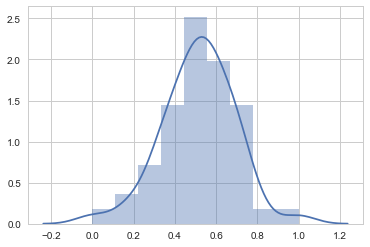

In [113]:
#visualizar na distribuição do gráfico

sns.distplot(np.array(data_scaled).reshape(-1))
plt.show()

<h3>Pré-Processamento de Dados - StandardScaler</h3>


In [122]:
#Criando dados de forma aleatória com random do numpy
data = np.random.normal(size = 50)
data = np.array(data).reshape(-1,1)
print(data)

[[ 5.09936661e-01]
 [ 1.63143221e-01]
 [ 1.11420587e+00]
 [-3.33414830e-01]
 [-3.50517507e-01]
 [ 7.58156645e-04]
 [-1.56628516e+00]
 [ 8.76782730e-01]
 [-1.65289510e-01]
 [-1.07739324e-01]
 [-8.40519559e-01]
 [ 5.07120048e-01]
 [ 1.07618075e+00]
 [ 7.75971562e-01]
 [-1.18730339e+00]
 [ 1.12203166e+00]
 [-9.20628750e-01]
 [-6.00280814e-01]
 [ 2.15221557e-01]
 [ 4.71512975e-01]
 [-4.68638863e-01]
 [ 6.18146465e-01]
 [ 1.33684051e+00]
 [ 5.71749835e-01]
 [-2.75743256e+00]
 [-1.12332639e+00]
 [ 2.07824212e+00]
 [-1.63140195e+00]
 [-2.40429657e-01]
 [ 1.48295665e-01]
 [ 8.50968958e-01]
 [-2.01395887e-01]
 [-1.20481282e+00]
 [-1.69884114e-02]
 [-9.00081770e-01]
 [ 7.54869259e-01]
 [-1.27344622e+00]
 [-9.32191496e-01]
 [-1.03482139e+00]
 [ 7.07461178e-01]
 [ 2.76649528e-01]
 [-5.02632135e-01]
 [ 5.41552477e-01]
 [ 6.32820537e-01]
 [ 1.68059751e+00]
 [-3.89524197e-03]
 [ 1.25835388e+00]
 [ 2.88565584e-01]
 [-5.21938464e-01]
 [-1.97307798e-01]]


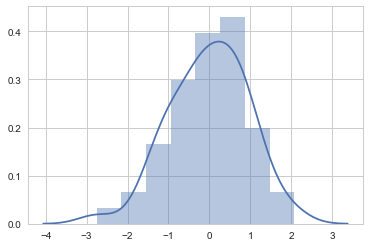

In [123]:
#visualizando os dados no gráfico

sns.distplot(np.array(data).reshape(-1))
plt.show()

In [124]:
#importando o StandardScaler

from sklearn.preprocessing import StandardScaler

In [125]:
#instanciando o objeto StandardScaler

scaler = StandardScaler().fit(data)

In [126]:
#transformando os dados com o objeto Scaler

data_scaled = scaler.transform(data)
print(data_scaled)

[[ 0.55427685]
 [ 0.1846462 ]
 [ 1.19833869]
 [-0.34461143]
 [-0.36284036]
 [ 0.01156768]
 [-1.65866935]
 [ 0.94528065]
 [-0.16541464]
 [-0.10407463]
 [-0.88511027]
 [ 0.55127476]
 [ 1.15780952]
 [ 0.83783081]
 [-1.25473068]
 [ 1.20667983]
 [-0.97049485]
 [-0.62905121]
 [ 0.24015403]
 [ 0.51332287]
 [-0.48874031]
 [ 0.66961254]
 [ 1.43563438]
 [ 0.62016058]
 [-2.92825677]
 [-1.18654063]
 [ 2.22585914]
 [-1.72807424]
 [-0.24550296]
 [ 0.1688209 ]
 [ 0.91776698]
 [-0.20389871]
 [-1.27339316]
 [-0.00734755]
 [-0.9485948 ]
 [ 0.81533887]
 [-1.34654623]
 [-0.98281903]
 [-1.09220736]
 [ 0.76480885]
 [ 0.30562718]
 [-0.52497212]
 [ 0.58797465]
 [ 0.68525294]
 [ 1.80202864]
 [ 0.00660784]
 [ 1.35197921]
 [ 0.31832794]
 [-0.54554982]
 [-0.19954141]]


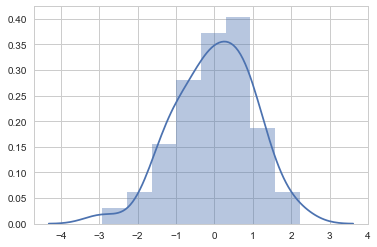

In [127]:
#visualização dos dados no gráfico 

sns.distplot(np.array(data_scaled).reshape(-1))
plt.show()